In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sampleSubmission.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


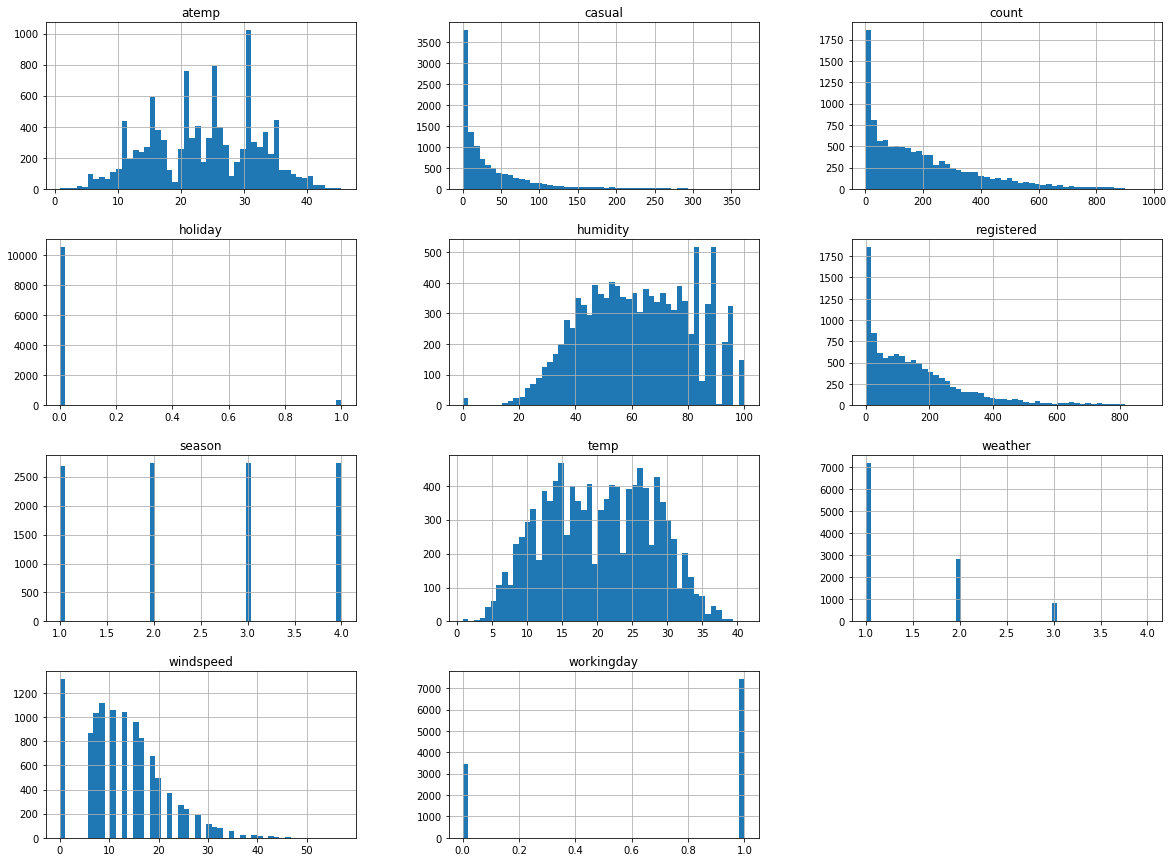

In [9]:
# histograms for plotting distribution 

train.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# extract hour from datetime

datetime = train['datetime']
train_hour = []
for i in datetime:
    data = i.split(' ')
    time = data[1]
    new_data = time.split(':')
    train_hour.append(new_data[0])
train['hour'] = train_hour

datetime = test['datetime']
test_hour = []
for i in datetime:
    data = i.split(' ')
    time = data[1]
    new_data = time.split(':')
    test_hour.append(new_data[0])
test['hour'] = test_hour

In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04


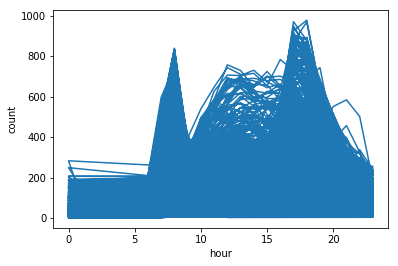

In [12]:
# hourly distribution

plt.plot(train['hour'], train['count'])
plt.xlabel('hour')
plt.ylabel('count')

In [13]:
# get day-type(monday, tuesday) from datetime

import datetime
train_weekday = []
test_weekday = []

for i in train['datetime']:
    train_weekday.append(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").strftime("%A"))
    
for i in test['datetime']:
    test_weekday.append(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").strftime("%A"))

train['weekday'] = train_weekday
test['weekday'] = test_weekday

In [14]:
# convert weekday to 0-6

train['weekday'] = train['weekday'].map({'Monday': 0,
                                        'Tuesday': 1,
                                        'Wednesday': 2,
                                        'Thursday': 3,
                                        'Friday': 4,
                                        'Saturday': 5,
                                        'Sunday': 6})
test['weekday'] = test['weekday'].map({'Monday': 0,
                                        'Tuesday': 1,
                                        'Wednesday': 2,
                                        'Thursday': 3,
                                        'Friday': 4,
                                        'Saturday': 5,
                                        'Sunday': 6})

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04,5


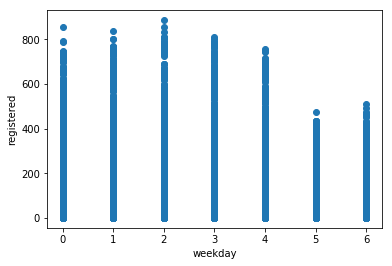

In [16]:
# weekday distribution of registered users

plt.scatter(train['weekday'], train['registered'])
plt.xlabel('weekday')
plt.ylabel('registered')

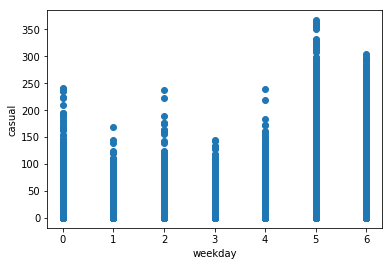

In [17]:
# weekday distribution of casual users

plt.scatter(train['weekday'], train['casual'])
plt.xlabel('weekday')
plt.ylabel('casual')

In [18]:
# Extract year, month and day

train["datetime"] = pd.to_datetime(train["datetime"])
import datetime
year = train['datetime'].dt.year
month = train['datetime'].dt.month
day = train['datetime'].dt.day
train['year'] = year
train['month'] = month
train['day'] = day

test["datetime"] = pd.to_datetime(test["datetime"])
import datetime
year = test['datetime'].dt.year
month = test['datetime'].dt.month
day = test['datetime'].dt.day
test['year'] = year
test['month'] = month
test['day'] = day

In [19]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00,5,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,5,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02,5,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03,5,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04,5,2011,1,1


In [20]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,weekday,year,month,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,00,3,2011,1,20
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,01,3,2011,1,20
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,02,3,2011,1,20
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,03,3,2011,1,20
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,04,3,2011,1,20


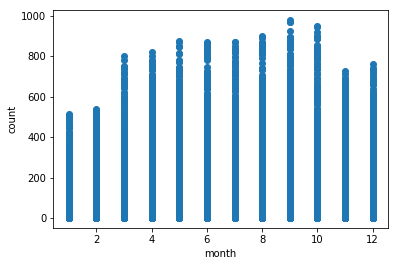

In [21]:
# month-wise distribution

plt.scatter(train['month'], train['count'])
plt.xlabel('month')
plt.ylabel('count')
plt.show()

In [22]:
# Hour bins: high, average and low

train_bins = []
for i in train['hour']:
    if (i > '06' and i < '10') or (i > '16' and i < '20'):
        train_bins.append('high')
    elif(i > '09' and i < '17'):
        train_bins.append('average')
    elif(i >= '00' and i < '07') or (i > '19' and i < '24'):
        train_bins.append('low')

train['hourbins'] = train_bins

test_bins = []
for i in test['hour']:
    if (i > '06' and i < '10') or (i > '16' and i < '20'):
        test_bins.append('high')
    elif(i > '09' and i < '17'):
        test_bins.append('average')
    elif(i >= '00' and i < '07') or (i > '19' and i < '24'):
        test_bins.append('low')

test['hourbins'] = test_bins

In [23]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,year,month,day,hourbins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00,5,2011,1,1,low
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,5,2011,1,1,low
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02,5,2011,1,1,low
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03,5,2011,1,1,low
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04,5,2011,1,1,low


In [24]:
# year bins from 1-8

bins_train = []
for i in range(10886):
    if train['year'][i] == 2011:
        if (train['month'][i] > 0 and train['month'][i] < 4):
            bins_train.append(1)
        elif(train['month'][i] > 3 and train['month'][i] < 7):
            bins_train.append(2)
        elif(train['month'][i] > 6 and train['month'][i] < 10):
            bins_train.append(3)
        elif(train['month'][i] > 9 and train['month'][i] < 13):
            bins_train.append(4)
    elif train['year'][i] == 2012:
        if (train['month'][i] > 0 and train['month'][i] < 4):
            bins_train.append(5)
        elif(train['month'][i] > 3 and train['month'][i] < 7):
            bins_train.append(6)
        elif(train['month'][i] > 6 and train['month'][i] < 10):
            bins_train.append(7)
        elif(train['month'][i] > 9 and train['month'][i] < 13):
            bins_train.append(8)

In [25]:
# year bins

bins_test = []
for i in range(6493):
    if test['year'][i] == 2011:
        if (test['month'][i] > 0 and test['month'][i] < 4):
            bins_test.append(1)
        elif(test['month'][i] > 3 and test['month'][i] < 7):
            bins_test.append(2)
        elif(test['month'][i] > 6 and test['month'][i] < 10):
            bins_test.append(3)
        elif(test['month'][i] > 9 and test['month'][i] < 13):
            bins_test.append(4)
    elif test['year'][i] == 2012:
        if (test['month'][i] > 0 and test['month'][i] < 4):
            bins_test.append(5)
        elif(test['month'][i] > 3 and test['month'][i] < 7):
            bins_test.append(6)
        elif(test['month'][i] > 6 and test['month'][i] < 10):
            bins_test.append(7)
        elif(test['month'][i] > 9 and test['month'][i] < 13):
            bins_test.append(8)

In [26]:
print len(bins_train)
print len(bins_test)
train['yearbins'] = bins_train
test['yearbins'] = bins_test

10886
6493


In [27]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,year,month,day,hourbins,yearbins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00,5,2011,1,1,low,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,5,2011,1,1,low,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02,5,2011,1,1,low,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03,5,2011,1,1,low,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04,5,2011,1,1,low,1


In [28]:
# drop unnecessary columns

train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

In [29]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,year,month,day,hourbins,yearbins
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00,5,2011,1,1,low,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,5,2011,1,1,low,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02,5,2011,1,1,low,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03,5,2011,1,1,low,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04,5,2011,1,1,low,1


In [30]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,weekday,year,month,day,hourbins,yearbins
0,1,0,1,1,10.66,11.365,56,26.0027,00,3,2011,1,20,low,1
1,1,0,1,1,10.66,13.635,56,0.0000,01,3,2011,1,20,low,1
2,1,0,1,1,10.66,13.635,56,0.0000,02,3,2011,1,20,low,1
3,1,0,1,1,10.66,12.880,56,11.0014,03,3,2011,1,20,low,1
4,1,0,1,1,10.66,12.880,56,11.0014,04,3,2011,1,20,low,1


In [31]:
int_col = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 
           'hour', 'weekday', 'year', 'month', 'day', 'yearbins']
cat_col = ['hourbins']

In [32]:
# preprocess data before training

enc = LabelEncoder()

train['hourbins'] = enc.fit_transform(train['hourbins']).reshape(-1, 1)
test['hourbins'] = enc.transform(test['hourbins']).reshape(-1, 1)
   
scaler = StandardScaler()
for i in int_col:
    train[i] = scaler.fit_transform(train[i].reshape(-1, 1))
    test[i] = scaler.transform(test[i].reshape(-1, 1))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/webtunix/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/home/webtunix/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,year,month,day,hourbins,yearbins
0,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.993213,-1.567754,3,13,16,-1.668944,0.990793,-1.003866,-1.603121,-1.64207,2,-1.537554
1,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,8,32,40,-1.524341,0.990793,-1.003866,-1.603121,-1.64207,2,-1.537554
2,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,5,27,32,-1.379739,0.990793,-1.003866,-1.603121,-1.64207,2,-1.537554
3,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,3,10,13,-1.235137,0.990793,-1.003866,-1.603121,-1.64207,2,-1.537554
4,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,0,1,1,-1.090534,0.990793,-1.003866,-1.603121,-1.64207,2,-1.537554


In [34]:
# for casual users

X_train_1 = train.drop(['casual', 'registered', 'count'], axis=1)
y_train_1 = train['casual']
X_test = test

In [35]:
# RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100)

score = cross_val_score(forest_reg, X_train_1, y_train_1, cv=4)
print score

forest_reg.fit(X_train_1, y_train_1)
casual = forest_reg.predict(X_test)

[0.55468018 0.7864594  0.7927583  0.79257526]


In [36]:
# for registered users

X_train_2 = train.drop(['casual', 'registered', 'count'], axis=1)
y_train_2 = train['registered']
X_test = test

In [37]:
# RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100)

score = cross_val_score(forest_reg, X_train_2, y_train_2, cv=3)
print score

forest_reg.fit(X_train_2, y_train_2)
registered = forest_reg.predict(X_test)

[0.60263162 0.85764383 0.87610282]


In [38]:
# add both types to get total count

count = casual + registered
submission['count'] = count
submission.to_csv('sampleSubmission.csv', index=False)

Public score: 0.48420